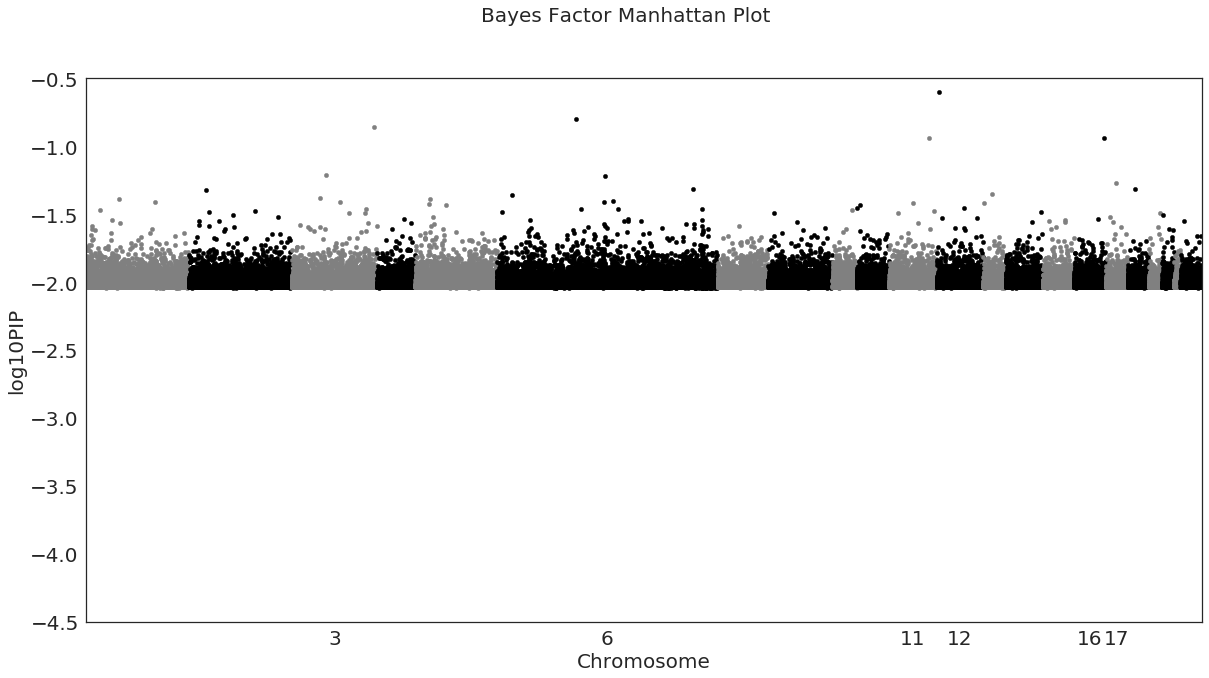

In [11]:
% matplotlib inline
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import scipy.io
sns.set_style('white')

colors = np.tile(['grey','black'], 11)

snpsloc = pd.read_csv('/storage/gablab001/data/genus/current/structured/cog-gen-bayes/data/100k_snp_loc_pval.csv')
tp = '/storage/gablab001/data/genus/current/structured/cog-gen-bayes/output_bf'
toplot = scipy.io.loadmat(os.path.join(tp, '100ksnp_VWMdomainAvgZ.mat'))
snpsloc['PIP'] = toplot['PIP']
snpsloc['log10PIP'] = np.log10(snpsloc['PIP'])
df = snpsloc.copy()
df.columns = ['chromosome', 'pvalue', 'snpid', 'PIP', 'log10PIP']
df['chrnum'] = [int(i[3:]) for i in df.chromosome]
df = df.sort_values('chrnum')
df['ind'] = range(len(df))
grouped = df.groupby(('chrnum'))

def plot_manhattan(data):
    fig = plt.figure(figsize=(20,10))
    fig.suptitle('Bayes Factor Manhattan Plot', fontsize=20)
    ax = fig.add_subplot(111)
    x_labels = []
    x_labels_pos = []
    for num, (name, group) in enumerate(data):
        group.plot(kind = 'scatter',  x = 'ind',
                   y = 'log10PIP', colors = colors[num % len(colors)],
                   ax = ax)
        if np.any(group['PIP'] > .05):
            x_labels.append(name)
        else:
            x_labels.append('')
        x_labels_pos.append((group['ind'].iloc[-1] - \
            (group['ind'].iloc[-1] - group['ind'].iloc[0]) / 2))
    ax.set_xticks(x_labels_pos)
    ax.set_xticklabels(x_labels)
    ax.set_xlim([0, len(df)])
    ax.set_ylim([-4.5, -.5])
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.xlabel('Chromosome', fontsize=20)
    plt.ylabel('log10PIP', fontsize=20)
    plt.savefig('manhattan_plot2.png', dpi=300, bbox_inches='tight')
    #plt.close(fig)

plot_manhattan(grouped)
